In [148]:
import numpy as np
import pandas as pd

# 가상 데이터

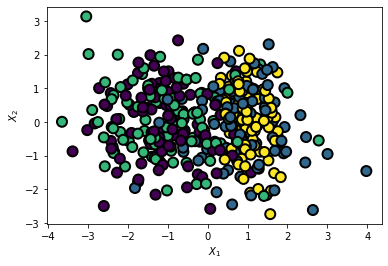

(320, 10)
(80, 10)
(320,)
(80,)


In [149]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# n_samples : 표본 데이터의 수, 디폴트 100
# n_features : 독립 변수의 수, 디폴트 20
# n_informative : 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수, 디폴트 2
# n_redundant : 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수, 디폴트 2
# n_repeated : 독립 변수 중 단순 중복된 성분의 수, 디폴트 0
# n_classes : 종속 변수의 클래스 수, 디폴트 2
# n_clusters_per_class : 클래스 당 클러스터의 수, 디폴트 2
# weights : 각 클래스에 할당된 표본 수
# random_state : 난수 발생 시드
# 반환값:
# X : [n_samples, n_features] 크기의 배열
# 독립 변수
# y : [n_samples] 크기의 배열
# 종속 변수
X, Y = make_classification(n_samples=400, n_features=10,
                           n_informative=3, n_redundant=2,
                           n_clusters_per_class=2, n_classes=4,
                           random_state=1)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
            s=100, edgecolor="k", linewidth=2)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()




X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=777, test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

# # Problem 1
CART decision Tree classifier.
- scikit-learn의 decision tree는 CART 기반 구현체이다.
- Problem 1과 같은 방법으로 CART classifier 모델을 학습시키고 test데이터의 정확도를 출력하시오.

In [150]:
from sklearn.tree import DecisionTreeClassifier

CART_model = None
accuracy = None
############# Put your code here ################
CART_model = DecisionTreeClassifier(criterion='gini', max_depth=None, max_leaf_nodes=None, min_samples_split=2, min_samples_leaf=1, max_features=None)
CART_model.fit(X_train, Y_train)
# accuracy=(Y_test == CART_model.predict(X_test)).sum()/(len(Y_test))
accuracy=CART_model.score(X_test, Y_test)

################################################# 
print('Test data prediction accuracy (CART) : %f'%accuracy)

Test data prediction accuracy (CART) : 0.737500


# # Problem 2
Random Forest classifier.
- scikit-learn의 random forest 패키지를 이용하여 모델을 학습시키고 test데이터의 정확도를 출력하시오.

In [151]:
from sklearn.ensemble import RandomForestClassifier

Random_Forest_model = None
accuracy = None
############# Put your code here ################
Random_Forest_model = RandomForestClassifier(n_estimators=150,#모델갯수
                                            max_depth=None,
                                            max_features=None#샘플링시 컬럼갯수
                                            )
Random_Forest_model.fit(X_train, Y_train)
accuracy=Random_Forest_model.score(X_test, Y_test)
################################################# 
print('Test data prediction accuracy (Random Forest) : %f'%accuracy)

Test data prediction accuracy (Random Forest) : 0.775000


# # Problem 3
XGBoost classifier.
- XGBoost 패키지를 pip install을 통해 설치하시오.
- 패키지를 불러와 모델을 학습시키고 test데이터의 정확도를 출력하시오.

In [152]:
##########Put your installation code here###############
!pip install XGBoost
########################################################

In [153]:
import xgboost as xgb

XGB_model = None
accuracy = None
############# Put your code here ################
XGB_model = xgb.XGBClassifier(#objective='multi:softprob',# classigier이고, num_class자동지정
                              eval_metric='mlogloss',
                              learning_rate=0.3,
                              reg_alpha= 0,
                              reg_lambda= 1.0,
#                               num_class= 4, # 명시 안해도 자동
                              n_jobs= 2,
                              use_label_encoder=False,
                              seed = None )
XGB_model.fit(X_train,Y_train)
accuracy=XGB_model.score(X_test, Y_test)          
################################################# 
print('Test data prediction accuracy (XGBoost) : %f'%accuracy)

Test data prediction accuracy (XGBoost) : 0.762500


# # Problem 4
LightGBM classifier.
- LighGBM 패키지를 pip install을 통해 설치하시오.
- 패키지를 불러와 모델을 학습시키고 test데이터의 정확도를 출력하시오.

In [154]:
##########Put your installation code here###############
!pip install LightGBM
########################################################

In [155]:
import lightgbm as lgb

LGBM_model = None
accuracy = None
############# Put your code here ################
DS_train = lgb.Dataset(X_train, label=Y_train)
DS_test = lgb.Dataset(X_test, label=Y_test)

LGBM_model = lgb.LGBMClassifier(learning_rate=0.1,
                              reg_alpha= 0,
                              reg_lambda= 0,
                              n_jobs= 2,
                              seed = None )
LGBM_model.fit(X_train, Y_train)
accuracy=LGBM_model.score(X_test, Y_test)   

################################################# 
print('Test data prediction accuracy (LightGBM) : %f'%accuracy)

Test data prediction accuracy (LightGBM) : 0.750000


# # Problem 5
Naive Bayes classifier.
- Scikit-learn의 Gaussian Naive Bayes classifier를 불러와 학습시키고, test데이터의 정확도를 출력하시오.

In [156]:
from sklearn.naive_bayes import GaussianNB

NB_model = None
accuracy = None
############# Put your code here ################
NB_model = GaussianNB(priors=None,var_smoothing=1e-9)
NB_model.fit(X_train, Y_train)
accuracy=NB_model.score(X_test, Y_test) 

################################################# 
print('Test data prediction accuracy (NaiveBayes) : %f'%accuracy)

Test data prediction accuracy (NaiveBayes) : 0.700000


# # Problem 6
SVM Bayes classifier.
- Scikit-learn의 SVM classifier를 불러와 학습시키고, test데이터의 정확도를 출력하시오.

In [161]:
from sklearn.svm import SVC

SVM_model = None
accuracy = None
############# Put your code here ################
SVM_model = SVC(kernel='linear')
SVM_model.fit(X_train, Y_train)
accuracy=SVM_model.score(X_test, Y_test) 
#################################################
print('Test data prediction accuracy (SVC) : %f'%accuracy)

Test data prediction accuracy (SVC) : 0.712500


# # Problem 7
MLP classifier.
- Scikit-learn의 MLP classifier를 불러와 학습시키고, test데이터의 정확도를 출력하시오.

In [158]:
from sklearn.neural_network import MLPClassifier

MLP_model = None
accuracy = None
############# Put your code here ################
MLP_model = MLPClassifier(hidden_layer_sizes=(128,16),
                          activation="relu",
                          max_iter=1000,
                          random_state=1).fit(X_train, Y_train)
accuracy=MLP_model.score(X_test, Y_test) 
#################################################
print('Test data prediction accuracy (MLPClassifier) : %f'%accuracy)

Test data prediction accuracy (MLPClassifier) : 0.675000


# # Problem 8
Ensemble classifier.
- 위의 7개의 모델(CART, Random Forest, XGBoost, LightGBM, Naive Bayes, SVM, MLP)을 이용하여 Voting(7개의 예측 label중 가장 많이 예측된 label을 최종 prediction label로 택하는것)방법으로 최종 label을 택한 뒤, 예측 정확도를 출력하시오.
- Scikit-learn의 VotingClassifier 패키지를 사용하여 작성.
- 위에서 학습시킨 모델 변수명 사용 가능.

In [159]:
from sklearn.ensemble import VotingClassifier

ensemble_classifier = None
accuracy = None
############# Put your code here ################
ensemble_classifier=VotingClassifier(estimators=[
                                                ('CART',CART_model ),
                                                ('Random Forest',Random_Forest_model),
                                                ('XGBoost',XGB_model),
                                                ('LightGBM',LGBM_model),
                                                ('Naive Bayes',NB_model),
                                                ('SVM',SVM_model),
                                                ('MLP',MLP_model)],
                                                voting='hard')
# hard 가 클래스별 표 집계
# soft가 각 분류기의 예측을 평균내어 확률이 높은클래스로 가중치 투표
ensemble_classifier = ensemble_classifier.fit(X_train,Y_train)
accuracy=ensemble_classifier.score(X_test, Y_test)

################################################# 
print('Test data prediction accuracy (Ensemble) : %f'%accuracy)

Test data prediction accuracy (Ensemble) : 0.737500
